## Praca domowa 4

#### Autor: Marcel Witas

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.

In [7]:
df.loc[(df.Publisher == "Nintendo") & (df.Year > 2015) & (df.NA_Sales < df.EU_Sales)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4199,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
6477,6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
14703,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


b) Jak rodzaj gry zarobił najwięcej w roku 2010?

In [20]:
df10 = df.loc[(df.Year == 2010)]
sales_df =df10.groupby("Genre").Global_Sales.agg("sum").to_frame()
sales_df.loc[sales_df.Global_Sales == max(sales_df.Global_Sales)]

,Global_Sales
Genre,
Action,117.64


c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny Typ Gry i Średnia sprzedaż w Japonii.

In [43]:
df1 = df.groupby("Genre").EU_Sales.agg("mean").to_frame()
df2 = df.groupby("Genre").JP_Sales.agg("mean").to_frame()
df_merge = df1.merge(df2, on = "Genre")
df_merge = df_merge.loc[df_merge.EU_Sales < df_merge.JP_Sales].reset_index().loc[:, ["Genre", "JP_Sales"]]
df_merge.sort_values(["JP_Sales"], ascending = False).reset_index(drop = True).rename(columns = {'JP_Sales' : "Średnia sprzedaż w Japonii",
                     'Genre' : "Typ Gry"})



,Typ Gry,Średnia sprzedaż w Japonii
0,Role-Playing,0.238293
1,Puzzle,0.099439
2,Strategy,0.073284


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

### 1) oryginalny wykres wraz ze źródłem
<img src="images/do_poprawy.png" width=400 height=400 />
Żródło: https://twitter.com/zagrosik/status/1454439242852089864

### 2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił 
<img src="images/ok.png" width=650 height=500 />
Z pracy domowej: https://github.com/mini-pw/2022Z-DataVisualizationTechniques/tree/main/homeworks/hw2/WitasMarcel

### 3) poprawiony wykres z punktu 2) w Pythonie

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [8]:
data = {'sezon':  ["1", "2", "3", "4", "5 lub więcej"],
        'po': [26.3, 16.2, 12.1, 6, 39.4]
        }

df = pd.DataFrame(data)

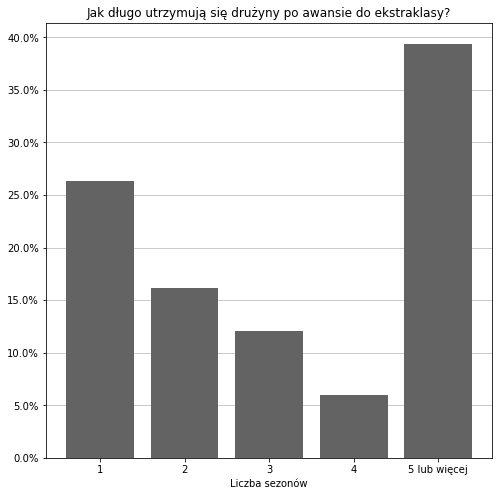

In [9]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(1,1,1)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.yaxis.grid(color='#bdbdbd', zorder=0) 

plt.bar(df.sezon, df.po, color='#636363', zorder=3)

plt.xlabel('Liczba sezonów')
plt.title('Jak długo utrzymują się drużyny po awansie do ekstraklasy?')



plt.show()

### 4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

Wykres rózni się od pierwotnego wykresu typem, zatem jest od niego lepszy już dzięki temu, że nie jest kołowy. W porównaniu do wykresu wykonanego w ggplot2 zaszło niewiele zmian. Pierwszą z nich jest brak wartości nad słupkami na wykresie, wprowadzały one niepotrzebną informację (można je odczytać w inny sposób). Kolejną zmianą jest tło, tym razem jest białe, nie szare. Nie ma na nim pionowych linii siatki - nie wprowadzały nowych informacji. Dodatkowo na osi Y pojawiły się wartości w procentach, dzięki temu łatwiej zauważyć, że dane są w procentach. Skrócone zostały również podpisy osi. Wszystko to czyni wykres moim zdaniem czytelniejszym niż dwa pozostałe.
